# Peyman hashemi

# 400131032

In [1]:
import math
import matplotlib.pyplot as plt
import scipy
import numpy as np
import tkinter
import skimage.transform as sktr
import numpy as np
import matplotlib
matplotlib.use('TkAgg')



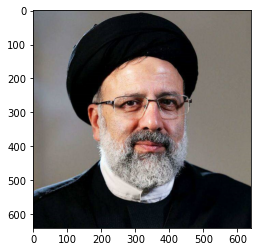

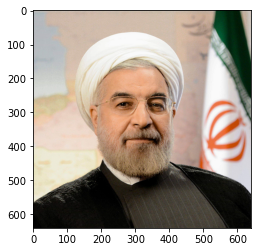

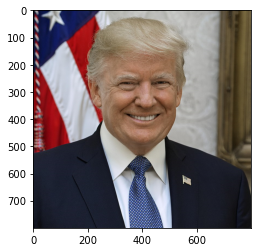

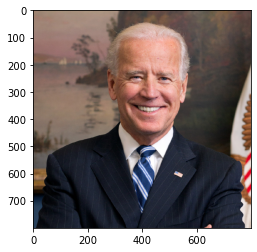

In [2]:
raisi = r"C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\3\DIP_HW3_2\inputs\P5\raisi.png"
rohani = r"C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\3\DIP_HW3_2\inputs\P5\rouhani.png"
trump= r"C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\3\DIP_HW3_2\inputs\P5\trump.png"
biden= r"C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\3\DIP_HW3_2\inputs\P5\biden.png"

raisi_img = plt.imread(raisi)
plt.imshow(raisi_img)
plt.show()
rohani_img = plt.imread(rohani)
plt.imshow(rohani_img)
plt.show()
trump_img= plt.imread(trump)
plt.imshow(trump_img)
plt.show()
biden_img= plt.imread(biden)
plt.imshow(biden_img)
plt.show()

In [3]:
def craeting_pairs(image1,iamge2, N=2):

    plt.imshow(image1)
    click1, click2 = plt.ginput(n=N)
    plt.close()

    plt.imshow(iamge2)
    click3, click4 = plt.ginput(n=N)
    plt.close()
    return (click1, click2,click3, click4)

In [4]:

first_points = ((284.8679653679654, 273.7857142857142), (392.2272727272728, 266.8593073593073), (265.82034632034635, 275.517316017316), (361.05844155844153, 277.24891774891773))
print('cordinates of points in first pair are listed as below : ')
print(first_points)

second_points = ((346.5198675496688, 273.37785136129503), (467.93267108167765, 266.01949963208244), (375.9532744665195, 247.6236203090508), (478.9701986754966, 251.30279617365704))
print('cordinates of points in second pair are listed as below : ')
print(second_points)




cordinates of points in first pair are listed as below : 
((284.8679653679654, 273.7857142857142), (392.2272727272728, 266.8593073593073), (265.82034632034635, 275.517316017316), (361.05844155844153, 277.24891774891773))
cordinates of points in second pair are listed as below : 
((346.5198675496688, 273.37785136129503), (467.93267108167765, 266.01949963208244), (375.9532744665195, 247.6236203090508), (478.9701986754966, 251.30279617365704))


In [5]:

def recenter(im, r, c):
    R, C, _ = im.shape
    rpad = (int) (np.abs(2*r+1 - R))
    cpad = (int) (np.abs(2*c+1 - C))
    return np.pad(
        im, [(0 if r > (R-1)/2 else rpad, 0 if r < (R-1)/2 else rpad),
             (0 if c > (C-1)/2 else cpad, 0 if c < (C-1)/2 else cpad),
             (0, 0)], 'constant')

In [6]:
def find_centers(p1, p2):
    cx = np.round(np.mean([p1[0], p2[0]]))
    cy = np.round(np.mean([p1[1], p2[1]]))
    return cx, cy

In [7]:
def align_image_centers(im1, im2, pts):
    p1, p2, p3, p4 = pts
    cx1, cy1 = find_centers(p1, p2)
    cx2, cy2 = find_centers(p3, p4)

    im1 = recenter(im1, cy1, cx1)
    im2 = recenter(im2, cy2, cx2)
    return im1, im2

In [8]:
def rescale_images(im1, im2, pts):
    p1, p2, p3, p4 = pts
    len1 = np.sqrt((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)
    len2 = np.sqrt((p4[1] - p3[1])**2 + (p4[0] - p3[0])**2)
    dscale = len2/len1
    if dscale < 1:
        im1 = sktr.rescale(im1, dscale)
    else:
        im2 = sktr.rescale(im2, 1./dscale)
    return im1, im2

In [9]:

def rotate_im(im1, pts):
    p1, p2, p3, p4 = pts
    theta1 = math.atan2(-(p2[1] - p1[1]), (p2[0] - p1[0]))
    theta2 = math.atan2(-(p4[1] - p3[1]), (p4[0] - p3[0]))
    dtheta = theta2 - theta1
    im1 = sktr.rotate(im1, dtheta*180/np.pi)
    return im1, dtheta

In [10]:
def match_img_size(im1, im2):
    h1, w1, _ = im1.shape
    h2, w2, _ = im2.shape
    if h1 < h2:
        im2 = im2[int(np.floor((h2-h1)/2.)) : -int(np.ceil((h2-h1)/2.)), :, :]
    elif h1 > h2:
        im1 = im1[int(np.floor((h1-h2)/2.)) : int(-np.ceil((h1-h2)/2.)), :, :]
    if w1 < w2:
        im2 = im2[:, int(np.floor((w2-w1)/2.)) : int(-np.ceil((w2-w1)/2.)), :]
    elif w1 > w2:
        im1 = im1[:, int(np.floor((w1-w2)/2.)) : int(-np.ceil((w1-w2)/2.)), :]
    return im1, im2

In [11]:
def align_images(im1, im2,pts):
    im1, im2 = align_image_centers(im1, im2, pts)
    im1, im2 = rescale_images(im1, im2, pts)
    im1, _ = rotate_im(im1, pts)
    im1, im2 = match_img_size(im1, im2)
    return im1, im2

In [12]:
raisi_align , rohani_align = align_images(raisi_img,rohani_img,first_points)
trump_align , biden_align = align_images(trump_img,biden_img,second_points)

In [13]:
def create_gray_image(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

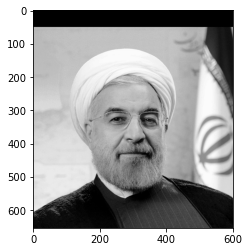

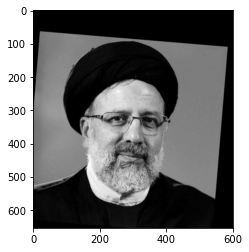

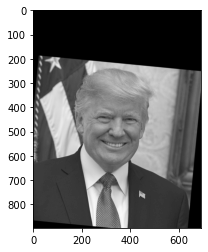

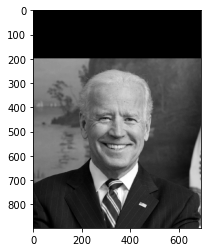

In [14]:
rohani_gray= create_gray_image(rohani_align)
raisi_gray= create_gray_image(raisi_align)
trump_gray= create_gray_image(trump_align)
biden_gray= create_gray_image(biden_align)

plt.imshow(rohani_gray,cmap="gray")
plt.show()

plt.imshow(raisi_gray,cmap="gray")
plt.show()
plt.imshow(trump_gray,cmap="gray")
plt.show()

plt.imshow(biden_gray,cmap="gray")
plt.show()

In [15]:
def fourier_transform(image):
    res = np.fft.fft2(image)
    fshift = np.fft.fftshift(res)
    return fshift

def phase_magnitude(image):
    fshift = fourier_transform(image)
    phase = np.angle(fshift)
    magnitude = 20*np.log(np.abs(fshift))
    return phase,magnitude

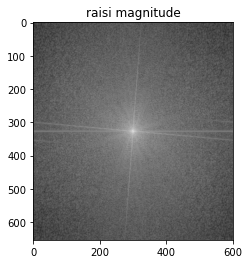

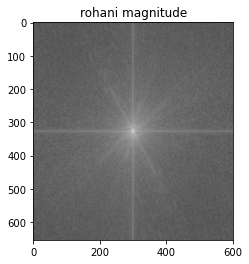

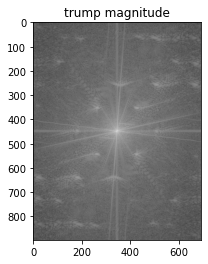

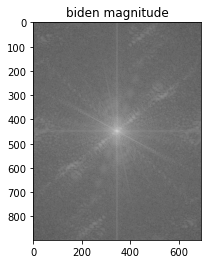

In [18]:
raisi_phase,raisi_magnitude = phase_magnitude(raisi_gray)
rohani_phase,rohani_magnitude = phase_magnitude(rohani_gray)
plt.imshow(raisi_magnitude,cmap="gray")
plt.title("raisi magnitude")
plt.show()
plt.imshow(rohani_magnitude,cmap="gray")
plt.title("rohani magnitude")
plt.show()

trump_phase,trump_magnitude = phase_magnitude(trump_gray)
biden_phase,biden_magnitude = phase_magnitude(biden_gray)
plt.imshow(trump_magnitude,cmap="gray")
plt.title("trump magnitude")
plt.show()
plt.imshow(biden_magnitude,cmap="gray")
plt.title("biden magnitude")
plt.show()


In [20]:
def create_hybrid_image(image1, image2, sigma,show_plt= True):
    low_pass = scipy.ndimage.filters.gaussian_filter(image1, sigma)
    high_pass = image2 - scipy.ndimage.filters.gaussian_filter(image2, sigma)
    if show_plt == True:
        plt.imshow(low_pass,cmap="Greys_r")
        plt.show()
        plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass)))),cmap="gray")
        plt.show()
        plt.imshow(high_pass,cmap="Greys_r")
        plt.show()
        plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass)))),cmap="gray")
        plt.show()
    return low_pass + high_pass

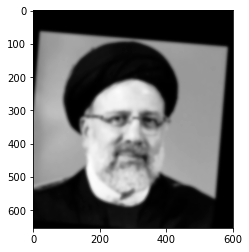

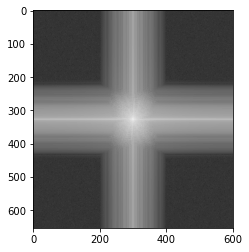

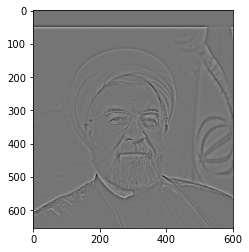

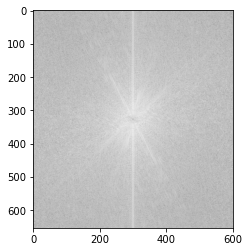

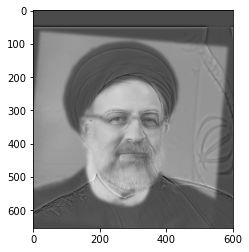

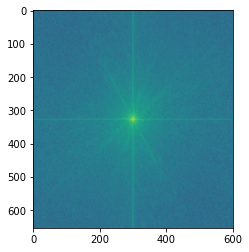

In [18]:
final_image = create_hybrid_image(raisi_gray, rohani_gray, 4)
plt.imshow(final_image, cmap="Greys_r")
plt.show()
_,magnitude_final = phase_magnitude(final_image)
plt.imshow(magnitude_final)
plt.show()

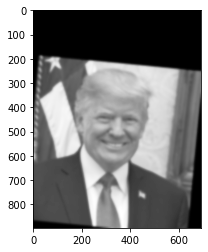

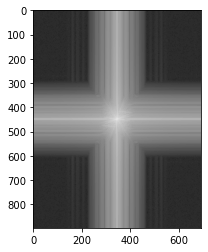

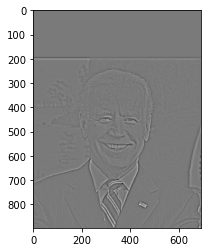

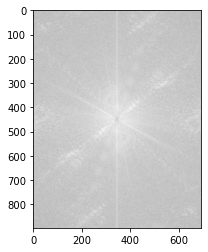

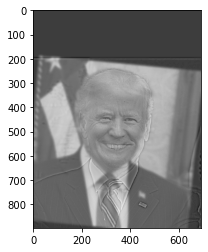

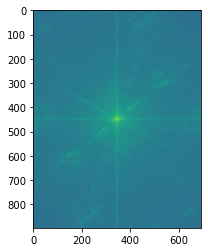

In [22]:
final_image = create_hybrid_image(trump_gray, biden_gray, 4)
plt.imshow(final_image, cmap="Greys_r")
plt.show()
_,magnitude_final = phase_magnitude(final_image)
plt.imshow(magnitude_final)
plt.show()

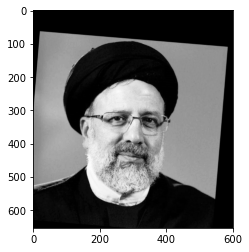

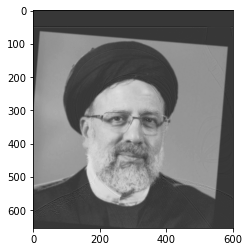

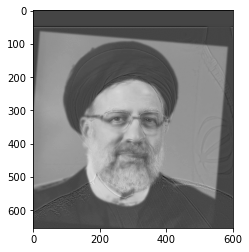

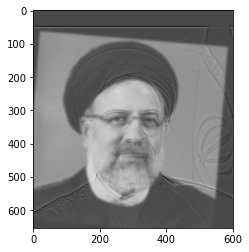

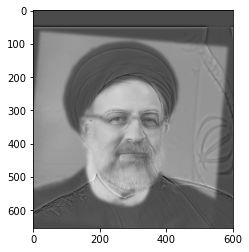

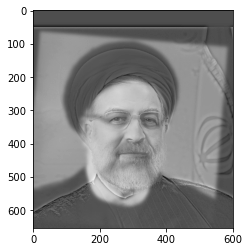

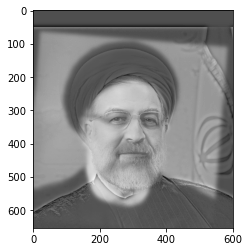

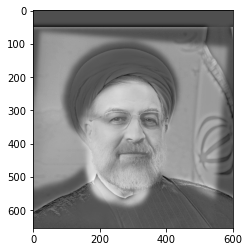

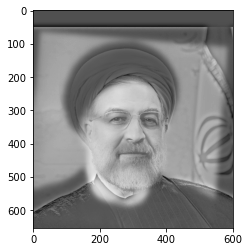

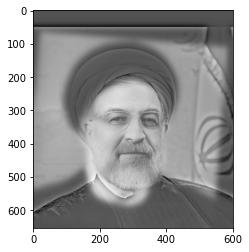

In [23]:
for i in range(0,10):
    final_image = create_hybrid_image(raisi_gray, rohani_gray, i,show_plt = False)
    plt.imshow(final_image, cmap="Greys_r")
    plt.show()


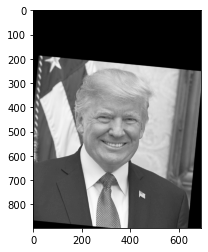

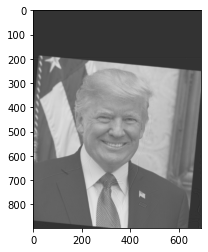

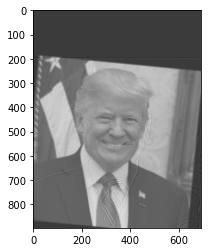

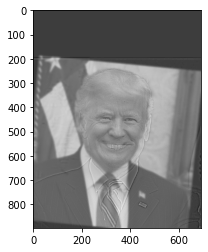

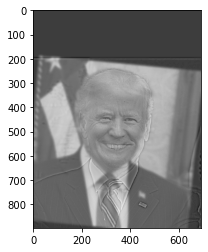

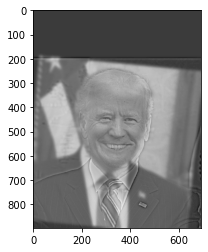

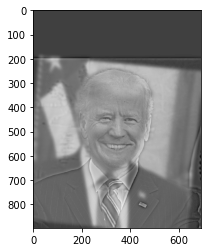

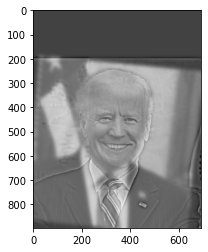

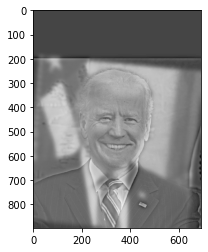

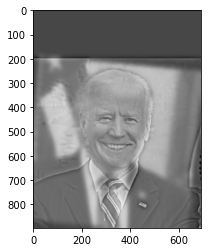

In [23]:
for i in range(0,10):
    final_image = create_hybrid_image(trump_gray, biden_gray, i,show_plt = False)
    plt.imshow(final_image, cmap="Greys_r")
    plt.show()
